<a href="https://colab.research.google.com/github/poudyaldiksha/Data-Science-project/blob/main/Lesson_25_b2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 25: Boxplots and Quartiles

---

### Activity 1:  Mounting the drive

In [ ]:

#Mounting the google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### Activity 2: Meteorite Landings Dataset  

**Acknowledgements**
This dataset was downloaded from NASA's Data Portal, and is based on The Meteoritical Society's Meteoritical Bulletin Database (this latter database provides additional information such as meteorite images, links to primary sources, etc.).

**Source:** NASA's Data Portal

   https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh



**About Data Set:** **Meteorite Landings**

This comprehensive data set from The Meteoritical Society contains information on all of the known meteorite landings.

Before diving into the meteorite landings dataset, it's essential to understand the differences between a meteoroid, a meteor, and a meteorite.

**What is a Meteoroid?**

A meteoroid is a small rocky or metallic body traveling through space. These objects often break off from larger bodies like asteroids due to collisions. When these space rocks come close to Earth, they are known as near-Earth objects.

**What is a Meteor?**

When a meteoroid enters Earth's atmosphere, it heats up and glows due to friction with the air. This glowing object is called a meteor, commonly known as a shooting star or fireball.

**What is a Meteorite?**

If a meteor survives its fiery passage through the atmosphere and lands on Earth's surface, it is called a meteorite.

**Summary**

- Meteoroid: When it is in space.
- Meteor: When it is burning up in Earth's atmosphere.
- Meteorite: When it has landed on Earth.


**Why are meteorites important to scientists?**

In [ ]:
# Import the required modules and Create a Pandas DataFrame.
import pandas as pd
import matplotlib.pyplot as plt

m_df=pd.read_csv("/content/drive/MyDrive/datasets/meteorite-landings.csv")
m_df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
#Find the number of rows and columns in the DataFrame.
m_df.shape

(45716, 10)

**The Data**


Note that a few column names start with `rec`(e.g., `recclass`, `reclat`, `reclong` ). These are the recommended values of these variables, according to The Meteoritical Society. In some cases, there were historical reclassification of a meteorite, or small changes in the data on where it was recovered; this dataset gives the currently recommended values.



The dataset contains the following variables:

1. `name`: the name of the place where a meteorite was found or observed.

2. `id`: a unique identifier for a meteorite.

3. `nametype`: one of the following:
    
    - `valid`: a typical meteorite.
    
    - `relict`: a meteorite that has been highly degraded by the weather on Earth.

4. `recclass`: the class of the meteorite; one of a large number of classes based on physical, chemical, and other characteristics.  (see the Wikipedia article on meteorite classification for a primer) to learn about the meteorite classification.

5. `mass:` the mass of the meteorite, in grams

6. `fall`: whether the meteorite was seen falling, or was discovered after its impact; one of the following:

    - `Fell`: the meteorite's fall was observed.
    
    - `Found`: the meteorite's fall was not observed.

7. `year`: the year the meteorite fell, or the year it was found (depending on the value of fell).

8. `reclat`: the latitude of the meteorite's landing.

9. `reclong`: the longitude of the meteorite's landing.

10. `GeoLocation`: a parentheses-enclose, comma-separated tuple that combines reclat and reclong.


**About Dataset**

The Meteoritical Society collects data on meteorites that have fallen to Earth from outer space. This dataset includes the location, mass, composition, and fall year for over 45,000 meteorites that have struck our planet.

**Notes on missing or incorrect data points:**

- a few entries here contain date information that was incorrectly parsed into the NASA database. As a spot check: any date that is before 860 CE or after 2016 are incorrect; these should actually be BCE years. There may be other errors and we are looking for a way to identify them.
- a few entries have latitude and longitude of 0N/0E (off the western coast of Africa, where it would be quite difficult to recover meteorites). Many of these were actually discovered in Antarctica, but exact coordinates were not given. 0N/0E locations should probably be treated as NA.

**What can we do with this data?**

Here are a couple of thoughts on questions to ask and ways to look at this data:

- How does the geographical distribution of observed falls differ from that of found meteorites?
- This would be great overlaid on a cartogram and
are there any geographical differences or differences over time in the class of meteorites that have fallen to Earth?

### Activity 3: Percentiles (or Quartiles)

In [ ]:
#Get the descriptive statistics for the 'year' values in the 'met_df' DataFrame.
m_df['year'].describe()

,year
count,45428.000000
mean,1991.772189
std,27.181247
min,301.000000
25%,1987.000000
50%,1998.000000
75%,2003.000000
max,2501.000000


We can also spot some of the values against the `25%, 50%` and `75%` parameters. They are called percentiles (or quartiles). Let's learn each of them one-by-one. Let's start with `25%`.

**Percentiles (or Quartiles)**

`25%` refers to the
$25^{th}$
percentile value. It is also called the **first quartile** value. *The first quartile is defined as the middle number between the smallest number and the median of the dataset.*

Let's understand this concept through an example. Consider the following series of numbers,

$3, 9, 6, 10, 7, 9, 7, 6, 1$

After arranging them in the increasing order, we have the following series

$1, 3, 6, 6, 7, 7, 9, 9, 10$

The median value of the series is
$7$
because it is the middle value. So, the
$25^{th}$
percentile (or first quartile) value will be the median of the following values

$1, 3, 6, 6, 7$

Therefore, first quartile or
$Q1 = 6$
because
$6$
is the median of the above sub-series.

**Note:** The median value is also referred to as the **second quartile** (or
$50^{th}$
percentile) value.

Similarly, `75%` refers to the
$75^{th}$
percentile value. It is also called the **third quartile** value. *The third quartile is the middle value between the median and the highest value of the dataset.*

So, the
$75^{th}$
percentile (or third quartile) value will be the median of the following values

$7, 7, 9, 9, 10$

Therefore, third quartile or
$Q3 = 9$
because
$9$
is the median of the above sub-series.

*The first, second and third quartile values together tell the spread of the data. If a majority of the data points are spread apart from each other, then there will be a significantly large difference between the three quartile values whereas if a majority of the data points are close to each other, then all three quartile values will also be close to each other.*

In the

$3, 9, 6, 10, 7, 9, 7, 6, 1$

series, the first, second and third quartile values are
$Q1=6, Q2=7$
and
$Q3=9$
respectively. This means the majority of the data points are quite close to each other which is quite evident from the series.

Similarly, in the case of the `year` column in the `met_df` DataFrame, the three quartile values are
$Q1=1987, Q2=1998$
and
$Q3=2003$
. This also suggests that the majority of the `year` values are quite close to each other.



**Standard Deviation (or `std`)**

*The standard deviation is the square root of the mean of squared deviations.* It tells us how far away a data point is from the mean value. Larger the standard deviation, farther the data point from the mean value.

For the above series, the mean value
$(\mu)$
is

$\mu = \frac{3+9+6+10+7+9+7+6+1}{9} = 6.44$

The **deviation** is the difference between the mean value and the individual data points in a series, i.e.,

$(3 - 6.44), (9 - 6.44), (6 - 6.44), (10 - 6.44), (7 - 6.44), (9 - 6.44), (7 - 6.44), (6 - 6.44), (1 - 6.44)$

are the deviations in the series.

The **squared deviation** is the square of deviations, i.e.,

$(3 - 6.44)^2, (9 - 6.44)^2, (6 - 6.44)^2, (10 - 6.44)^2, (7 - 6.44)^2, (9 - 6.44)^2, (7 - 6.44)^2, (6 - 6.44)^2, (1 - 6.44)^2$

are the squared deviations in the series.

The **mean of squared deviations (or MSD)** is a sum of all the squared deviations divided by the number number of values, i.e.,

$\frac{(3 - 6.44)^2 + (9 - 6.44)^2 + (6 - 6.44)^2 + (10 - 6.44)^2 + (7 - 6.44)^2 + (9 - 6.44)^2 + (7 - 6.44)^2 + (6 - 6.44)^2 + (1 - 6.44)^2}{9}$

So, the standard deviation (or
$std$
) is

$\sqrt{\frac{(3 - 6.44)^2 + (9 - 6.44)^2 + (6 - 6.44)^2 + (10 - 6.44)^2 + (7 - 6.44)^2 + (9 - 6.44)^2 + (7 - 6.44)^2 + (6 - 6.44)^2 + (1 - 6.44)^2}{9}}$

$\Rightarrow std = 2.92$

The significance of the standard deviation is that the numbers,
$9, 6, 7, 9, 7, 6$
, from the series, lie in the range
$(mean - std)$
and
$(mean + std)$
, i.e.,
$6.44 - 2.92 = 3.52$
and
$6.44 + 2.92 = 9.36$

So, these numbers are closest to the mean value.

The remaining three numbers,
$1, 3$
and
$10$
lie in the range
$(mean - 2\times std)$
and
$(mean + 2\times std)$
. So, these three numbers are farthest from the mean value.

We can verify the above calculations by first creating a Pandas series using the `pd.Series()` function and then by applying the `describe()` function on the
$3, 9, 6, 10, 7, 9, 7, 6, 1$
series.

**Note:** The MSD is also called **variance**. Therefore,
$variance = \sigma^2$
where
$\sigma$
is the standard deviation.

In [ ]:
pd_series = pd.Series([-8,3, 9, 6, 10, 7, 9, 7, 6, 1,20,25])
pd_series.describe()

,0
count,12.000000
mean,7.916667
std,8.414904
min,-8.000000
25%,5.250000
50%,7.000000
75%,9.250000
max,25.000000


### Activity 4: The Boxplot

Boxplots will plot the minimum, first quartile, second quartile, third quartile and maximum values in the form of a box.



In a boxplot:

1. The leftmost vertical line denotes the
$Q1 - 1.5 \times IQR$
value where
    
    - $IQR$
      stands for *inter-quartile range*. Its value is equal to
      $Q3 - Q1$

    - $Q1$
      denotes the first quartile value

    - $Q3$
      denotes the third quartile value

2. The left edge of the rectangle denotes the first quartile
   $(Q1)$
   value

3. The middle edge in the rectangle denotes the median
   $(Q2)$
   value

4. The right edge of the rectangle denotes the third quartile
   $(Q3)$
   value

5. The rightmost vertical line denotes the
   $Q3 + 1.5 \times IQR$
   value in the series

6. The two horizontal lines are called whiskers. The length of these whiskers represent the number of values lying between the
$Q1$ and $Q1 - 1.5 \times IQR$
values and the
$Q3$
and
$Q3 + 1.5 \times IQR$
values. **Smaller the length, the fewer number of values. Larger the length, more the number of values.**

7. The length of the rectangle also represents the number of values lying between the first and third quartile values.

8. The filled-circles beyond the vertical lines denote the **outliers**. The outliers in a dataset are those values which are unusually too large or too small. For example in the series

$$1, 3, 2, 8, 4, 8, 3, 7, 9, 3, 912109, 458825$$

   the numbers $912109, 458825$ are unusually high values compared to the majority of values.

To create a boxplot, we will use the `boxplot()` function from the `seaborn` library. The `seaborn` is another library for data visualisation. It is built on top of the `matplotlib.pyplot` library. For all practical purposes, the `seaborn` library is an extension to the `matplotlib.pyplot` library.

Seaborn Documentation

   https://seaborn.pydata.org/

In [ ]:
pd_series = pd.Series([1,3,2,8,4,8,3,7,9,3,912109,458825])
pd_series.describe()

,0
count,12.000000
mean,114248.500000
std,283778.173897
min,1.000000
25%,3.000000
50%,5.500000
75%,8.250000
max,912109.000000


In [ ]:
(1.5*4.75)

7.125

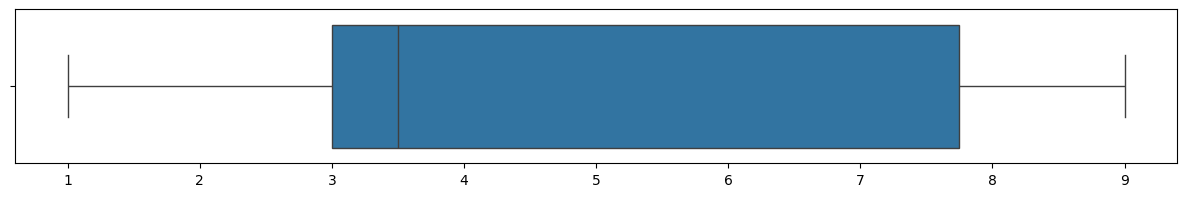

In [ ]:
# create a boxplot for series
import seaborn as sns
plt.figure(figsize =(15,2))
sns.boxplot(pd_series,orient="h")
plt.show()

As you can see, the boxplot helps us in knowing the spread of the data.

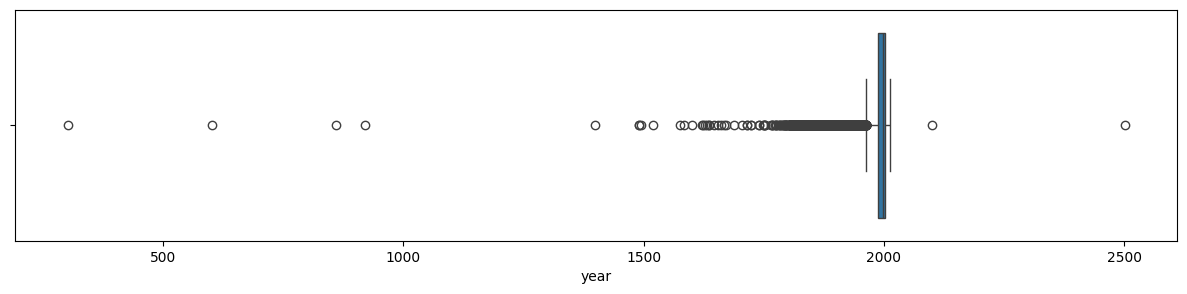

In [ ]:
#Create a boxplot for the 'year' values.
plt.figure(figsize=(15,3))
sns.boxplot(m_df["year"],orient = "h",)
plt.show()

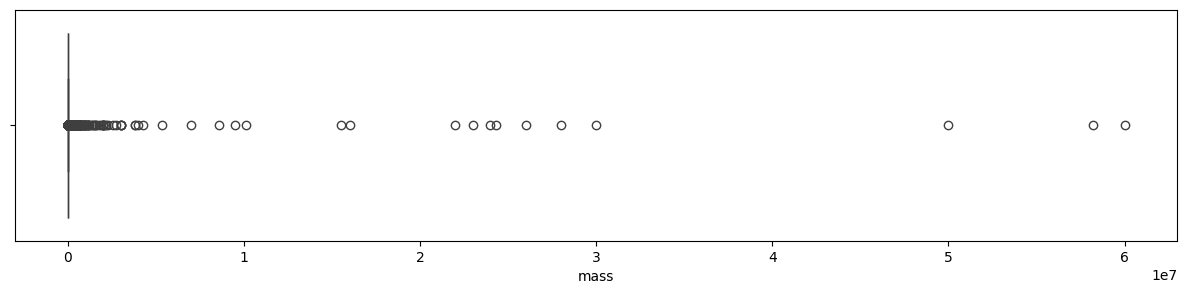

In [ ]:
#Create a boxplot for the 'mass' column
plt.figure(figsize=(15,3))
sns.boxplot(m_df["mass"],orient = "h")
plt.show()

In [ ]:
#Create a descriptive statistics summary for the 'mass' column.
m_df["mass"].describe()

,mass
count,4.558500e+04
mean,1.327808e+04
std,5.749889e+05
min,0.000000e+00
25%,7.200000e+00
50%,3.260000e+01
75%,2.026000e+02
max,6.000000e+07


In [ ]:
q = m_df[(m_df["year"]>=1990) & (m_df["year"]<= 2016)]
q

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001.0,13.66033,28.96000,"(13.660330, 28.960000)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,45.82133,6.01533,"(45.821330, 6.015330)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.745750, 32.412750)"
49,Ash Creek,48954,Valid,L6,9500.0,Fell,2009.0,31.80500,-97.01000,"(31.805000, -97.010000)"
70,Ban Rong Du,4934,Valid,"Iron, ungrouped",16700.0,Fell,1993.0,16.66667,101.18333,"(16.666670, 101.183330)"
...,...,...,...,...,...,...,...,...,...,...
45702,Zelfana,31353,Valid,L5,1058.0,Found,2002.0,32.15833,4.63333,"(32.158330, 4.633330)"
45710,Zillah 001,31355,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"


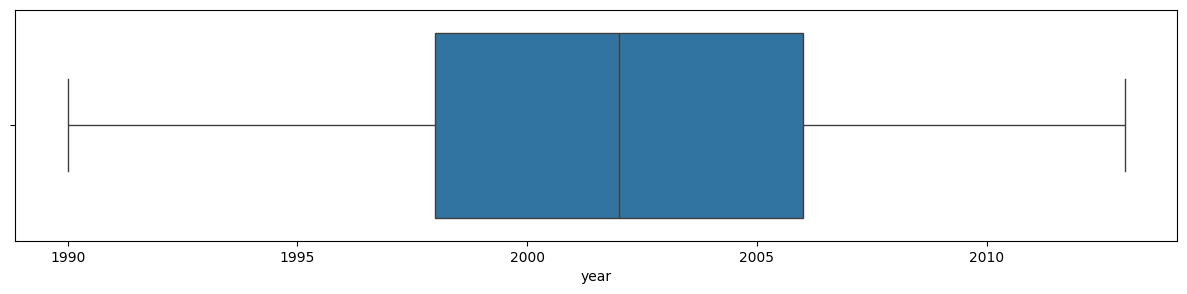

In [ ]:
#Create a boxplot for the 'mass' column
plt.figure(figsize=(15,3))
sns.boxplot(q["year"],orient = "h")
plt.show()

---

### Activity 5: Removing rows containing wrong years

 Remove all the rows having the year values greater than `2016` and lesser than `860`.

**Syntax:** `data_frame[some_condition]`


In [ ]:
m_df.shape

(45716, 10)

In [ ]:
#Retrieve all the rows from the  DataFrame containing the year values less than or equal to 2016.
m_df[m_df["year"]<=2016]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
# Retrieve all the rows having the year values greater than or equal to 860.
m_df[m_df["year"]>= 860]


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
m_df[(m_df["year"]>=860 )& (m_df["year"]<=2016)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
# Retrieve the rows having the year values greater than or equal to 860 and less than or equal to 2016 at the same time.
correct_years_df = m_df[(m_df["year"]>=860) & (m_df["year"]<= 2016)]
correct_years_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
m_df.shape[0]-correct_years_df.shape[0]

292

In [ ]:
#Calculate the percent of values retained.
round(correct_years_df.shape[0]/m_df.shape[0]*100,2)

99.36

In [ ]:
correct_years_df["year"].describe()

,year
count,45424.000000
mean,1991.826413
std,25.047805
min,860.000000
25%,1987.000000
50%,1998.000000
75%,2003.000000
max,2013.000000


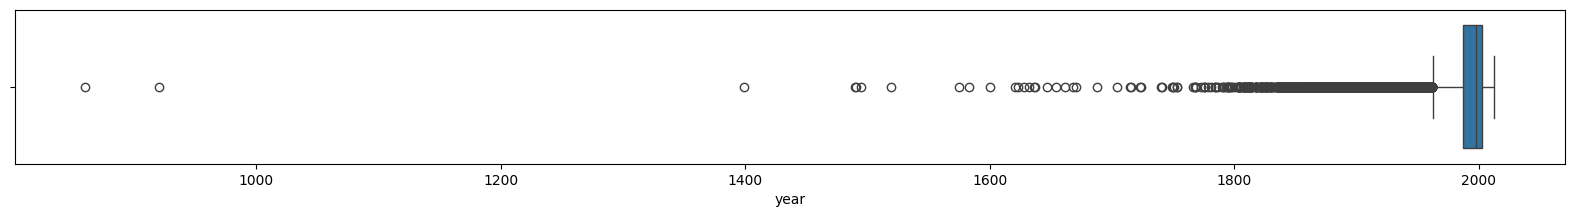

In [ ]:
# Make a boxplot for the 'year' column in the 'correct_years_df' DataFrame.
plt.figure(figsize = (20, 2))
sns.boxplot(correct_years_df["year"],orient="h")
plt.show()


### Activity 6: Removing invalid lat and long values

In [ ]:
#Retrieve all the rows having the 'reclong' values greater than or equal to -180 degrees and less than or equal to 180 degrees.
correct_long_df = correct_years_df[(correct_years_df["reclong"] >=-180) & (correct_years_df["reclong"]<=180)]
correct_long_df


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
45424-38221

7203

### Activity 7: Removing The Rows Containing `0 N, 0 E` Values Using The Tilde (`~`) Operator

Some rows in the dataset contain `0 reclat` and `0 reclong` values. These coordinates correspond to the intersection of the prime meridian and the Equator. It's important to remove these rows because they represent a location in the Atlantic Ocean, near the west coast of Africa. Meteorites that fall into this area are hard to recover.

In [ ]:
#Get only the rows having the 'reclat' value equal to 0.
correct_long_df[correct_long_df["reclat"]==0]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
596,Mason Gully,53653,Valid,H5,24.54,Fell,2010.0,0.0,0.00000,"(0.000000, 0.000000)"
610,Meru,15491,Valid,LL6,6000.00,Fell,1945.0,0.0,37.66667,"(0.000000, 37.666670)"
1648,Allan Hills 09004,52119,Valid,Howardite,221.70,Found,2009.0,0.0,0.00000,"(0.000000, 0.000000)"
1649,Allan Hills 09005,55797,Valid,L5,122.30,Found,2009.0,0.0,0.00000,"(0.000000, 0.000000)"
1650,Allan Hills 09006,55798,Valid,H5,104.30,Found,2009.0,0.0,0.00000,"(0.000000, 0.000000)"
...,...,...,...,...,...,...,...,...,...,...
45655,Yamato 984144,40764,Valid,H6,37.44,Found,1998.0,0.0,0.00000,"(0.000000, 0.000000)"
45656,Yamato 984145,40765,Valid,L6,54.80,Found,1998.0,0.0,0.00000,"(0.000000, 0.000000)"
45657,Yamato 984146,40766,Valid,H3,19.32,Found,1998.0,0.0,0.00000,"(0.000000, 0.000000)"
45658,Yamato 984147,40767,Valid,LL6,118.90,Found,1998.0,0.0,0.00000,"(0.000000, 0.000000)"


In [ ]:
# Get only the rows NOT having the 'reclat' value equal to 0. Use the tilde operator for this operation.
correct_long_df[~(correct_long_df["reclat"]==0)]

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


The `tilde operator` denotes the negation of a condition. In other words, it converts the `True` value to `False` value and vice-versa.

In [ ]:
#Remove the rows containing the 0 'reclat' and 0 'reclong' values from the 'correct_long_df'.
correct_lat_long_df = correct_long_df[~((correct_long_df['reclat'] == 0 ) & (correct_long_df['reclong'] == 0))]
correct_lat_long_df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
round(correct_lat_long_df.shape[0] * 100 / m_df.shape[0], 2)

70.08

### Activity 8: Checking The Missing Values

So far we have removed all the unwanted values or rows. Now it's time to check whether we have any missing values or not. The missing values are generally reported as `NaN` values. We can find the rows or columns containing the `NaN` values using either the `isnull()` or the `isna()` function. They both return `True` for the `NaN` (or null or missing) values.

Let's first check whether any column has a missing value or not.

In [ ]:
#Check whether the 'correct_lat_long_df' DataFrame has missing values or not using the 'isnull()' function.
correct_lat_long_df.isnull().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass,107
fall,0
year,0
reclat,0
reclong,0
GeoLocation,0


In [ ]:
correct_lat_long_df.isna().sum()

,0
name,0
id,0
nametype,0
recclass,0
mass,107
fall,0
year,0
reclat,0
reclong,0
GeoLocation,0


In [ ]:
#Retrieve all the rows containing the missing 'mass' values in the 'correct_lat_long_df' DataFrame.
correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True]



We are not going to remove these rows. Instead, we will replace all the `NaN` values in the `mass` column with the median mass value because most of the `mass` values lie between the first and the third quartile values. The second quartile (or median) is a fair representative of the values lying in the inter-quartile range, i.e., $(Q3 - Q1)$.

More importantly, the quartile values remain unaffected by the unusually very high or very low values. In other words, the outliers do not affect the quartile values because they are computed by arranging all the values in the increasing order.

Now, let's get the descriptive statistics for the `mass` column in the `correct_lat_long_df` DataFrame.

In [ ]:
correct_lat_long_df['mass'].describe()

,mass
count,3.192900e+04
mean,1.854289e+04
std,6.868495e+05
min,0.000000e+00
25%,6.500000e+00
50%,2.960000e+01
75%,2.020000e+02
max,6.000000e+07


In [ ]:
import pandas as pd
a = pd.Series(data= (1,2,3,4), index=(1,2,3,4))
a

,0
1,1
2,2
3,3
4,4


In [ ]:
b = a.index
b

Index([1, 2, 3, 4], dtype='int64')

In [ ]:
 #Create a list of the indices of above rows.
row_indices = correct_lat_long_df[correct_lat_long_df['mass'].isnull() == True].index
row_indices

So, here we have an array containing the indices of all the rows having the `NaN` mass values. There are 107 such rows.

### Activity 9: The `loc[]` Function

Now, let's replace the missing `mass` values with the median of `mass` values. For this, we need to use the `loc[]` function from Pandas library. It is an extension to the `iloc[]` function. The `iloc[]` function takes only the row and column indices as inputs. But in addition to the row and column indices, the `loc[]` function also accepts the array of row indices and column indices as inputs. It also accepts the specific column names as inputs.

Let's create a Pandas series containing all the rows having the `NaN` mass values using the `loc[]` function. We will pass `row_indices` array and `mass` column as inputs to the `loc[]` function. Let's store the series obtained in the `missing_mass_values` variable.

In [ ]:
# Retrieve the missing 'mass' values from 'correct_lat_long_df' DataFrame using the 'loc[]' function.
missing_mass_values = correct_lat_long_df.loc[row_indices, 'mass']
missing_mass_values

In [ ]:
k= correct_lat_long_df.loc[row_indices, :]
k

Here, we have a Pandas series which contains all the `NaN` mass values. The length of this series is `107`.

---

### Activity 10: Replacing The Missing `mass` Values

Now, let's replace the missing `mass` values in the 107 rows with the median of the `mass` values. Again, we will use the `loc[]` function for this exercise.

Using the `loc[]` function with `row_indices` and `mass` as inputs, we will get all the `NaN` values in the `mass` column. Then, using the `median()` function, we will get the median value which we are going to assign to the rows having the missing `mass` values in the `correct_lat_long_df`.

**Note:** Python will throw some warning after running the code below. Ignore it!

In [ ]:
y= pd.Series([1,2,3,4,5])
a =y.median()
y[1]=a
y

In [ ]:
# Replace the missing values in the 'mass' column in the 'correct_lat_long_df' DataFrame with median of mass.
median_mass = correct_lat_long_df['mass'].median()
correct_lat_long_df.loc[row_indices, 'mass'] = median_mass

Now, let's check whether all the missing mass values have been replaced by the median of the mass values or not. We can do this with the help of the `loc[]` function.

In [ ]:
#Check whether all the missing mass values have been replaced by the median of the mass values or not.
correct_lat_long_df.loc[row_indices, "mass"]

Each item in the `mass` column in the above DataFrame of 107 rows is `29.6` grams.

Let's confirm it by getting the descriptive statistics for the `mass` column in the above DataFrame using the `describe()` function. Except for the `std` and `count` values, all other values should be `29.6`. The `std` value should be very very close to `0` because every value will be the same as the mean value. The `count` value should be `107`.

In [ ]:
# Create a descriptive statistics summary of the 'mass' column in the above DataFrame containing 107 rows.
correct_lat_long_df.loc[row_indices, 'mass'].describe()

As expected, the `count` value is `107`, the `std` value is very close to `0` because $10^{-14}$ or $\frac{1}{10^{14}}$ is practically zero.

Now, let's get the descriptive statistics for the entire `mass` column in `correct_lat_long_df`.

In [ ]:
#  Create a descriptive statistics summary of the 'mass' column in the 'correct_lat_long_df' DataFrame.
correct_lat_long_df['mass'].describe()

As you can see there is no major change in the `std, min, 25%, 50%, 75%` and `max` values. They all are the same which is how it should be. **Treatment of the missing values should not affect the original dataset drastically.**



we will create a cartogram using the Folium package. There are other Python packages to create cartograms but Folium is the easiest one to get started. If we require other modules to create maps in some problem statement then we will explore them as well.

A cartogram is simply a world map marked with the country-wise or state-wise trend in data. We will create a cartogram for the landing sites of meteorites. It will have markers for the places from where a meteorite was found to pin-point the meteorite landing site.